In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np


In [ ]:
model = models.Sequential()
#model.add(layers.Conv2D(4,(2,2), input_shape=(3,28,28)))
model.add(layers.Conv2D(4,(2,2), input_shape=(28,28,1)))#default is data_format=channels_last
model.add(layers.Flatten())
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(10,'softmax'))
print(model.summary())


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 27, 27, 4)         20        
_________________________________________________________________
flatten_6 (Flatten)          (None, 2916)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               291700    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 292,730
Trainable params: 292,730
Non-trainable params: 0
_________________________________________________________________
None


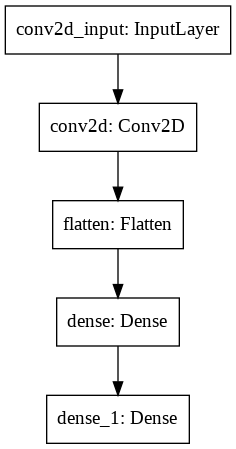

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = (np.expand_dims(train_images,-1), train_labels), (np.expand_dims(test_images,-1), test_labels)

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
import numpy as np
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=1, batch_size=16)

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 33s 548us/sample - loss: 0.9318 - acc: 0.8814 - val_loss: 0.2720 - val_acc: 0.9363


# Let's reshape into video data
Say we take every 10 frames of the 60K into one video stream:

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
(train_images, train_labels), (test_images, test_labels) = (np.reshape(train_images, (6000,10,28,28,1)), np.reshape(train_labels, (6000,10,1))), (np.reshape(test_images, (1000,10,28,28,1)), np.reshape(test_labels, (1000,10,1)))

In [ ]:

model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=1, batch_size=16)

ValueError: ignored

__So how can we feed the 5D video data?__

# TimeDistributed to the rescue!

What we actually seek is to apply the __same__ filter, across all the video frames (we don't need a separate parameters for every frame)


This wrapper applies a layer to every temporal slice of an input.

The input should be at least 3D, and the dimension of index one will be considered to be the temporal dimension.



In [ ]:
model = models.Sequential()
#model.add(layers.Conv2D(4,(2,2), input_shape=(3,28,28)))
model.add(layers.TimeDistributed(layers.Conv2D(4,(2,2)), input_shape=(10, 28,28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(10,'softmax'))
print(model.summary())


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_4 (TimeDist (None, 10, 27, 27, 4)     20        
_________________________________________________________________
flatten_7 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               2916100   
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 2,917,130
Trainable params: 2,917,130
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['acc'])

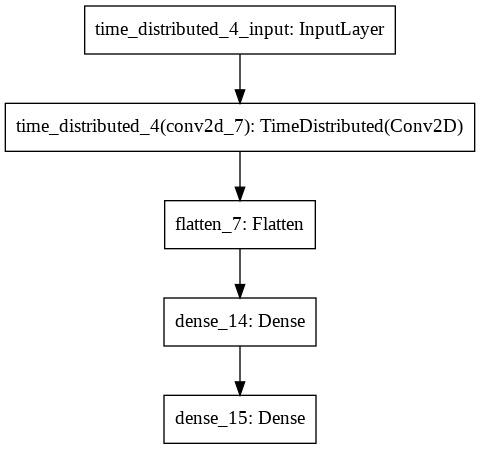

In [ ]:
plot_model(model, to_file='model.png')

Notice how the number of parameters remain the same (20)! 

Since we repeat the same filter across all the frames.

However, the output of flatten is x10, since we just concat all the frames outputs.

In [ ]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#(train_images, train_labels), (test_images, test_labels) = (np.reshape(train_images, (6000,10,28,28,1)), np.reshape(train_labels, (6000,10,1))), (np.reshape(test_images, (1000,10,28,28,1)), np.reshape(test_labels, (1000,10,1)))
train_images, test_images = np.reshape(train_images, (6000,10,28,28,1)), np.reshape(test_images, (1000,10,28,28,1))

In this case, we are __grouping/summarizing__ every 10 frames into one video, which can have __one__label.

So we need to take the last labels of every 10 as the video label:
But if we want to do this, we can'

In [ ]:
train_labels[::10].shape

(6000,)

In [ ]:
train_labels = train_labels[::10]
test_labels = test_labels[::10]

In [ ]:

model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=1, batch_size=16)

Train on 6000 samples, validate on 1000 samples
6000/6000 [==============================] - 23s 4ms/sample - loss: 44.4616 - acc: 0.1080 - val_loss: 2.3011 - val_acc: 0.1150


Of course the results are too bad! Since mnist is not video. We just used it to proof the concept.

# If we wanted to have classification per frame

In [ ]:
frame_model = models.Sequential()
frame_model.add(layers.Conv2D(4,(2,2), input_shape=(28,28,1)))
frame_model.add(layers.Flatten())
frame_model.add(layers.Dense(100, 'relu'))
frame_model.add(layers.Dense(10,'softmax'))
print(frame_model.summary())



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 27, 27, 4)         20        
_________________________________________________________________
flatten_8 (Flatten)          (None, 2916)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               291700    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 292,730
Trainable params: 292,730
Non-trainable params: 0
_________________________________________________________________
None


In this case, we have the same output shape as before for every frame

In [ ]:
model = models.Sequential()
model.add(layers.TimeDistributed(frame_model, input_shape=(10, 28,28,1)))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_5 (TimeDist (None, 10, 10)            292730    
Total params: 292,730
Trainable params: 292,730
Non-trainable params: 0
_________________________________________________________________


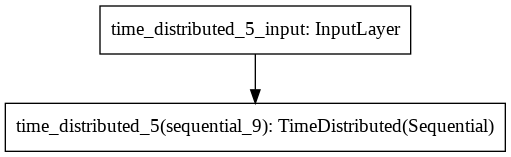

In [ ]:
plot_model(model, to_file='model.png')

The number of parameters remain the same, since we just repeat the same CNN



In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = (np.reshape(train_images, (6000,10,28,28,1)), np.reshape(train_labels, (6000,10,1))), (np.reshape(test_images, (1000,10,28,28,1)), np.reshape(test_labels, (1000,10,1)))

In [ ]:
train_images.shape

(6000, 10, 28, 28, 1)

In [ ]:
train_labels.shape

(6000, 10, 1)

In [ ]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:

model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=1, batch_size=16)

Train on 6000 samples, validate on 1000 samples
6000/6000 [==============================] - 13s 2ms/sample - loss: 11.3263 - acc: 0.2967 - val_loss: 11.2299 - val_acc: 0.3031
